In [6]:
import numpy as np
import pandas as pd

https://cambridgespark.com/content/tutorials/implementing-your-own-recommender-systems-in-Python/index.html

# Lista youtube:
https://www.youtube.com/watch?v=saXRzxgFN0o&list=PL_npY1DYXHPT-3dorG7Em6d18P4JRFDvH

# Content-Based (CB):
Asume que tenemos features y que podemos plantear la solución en función de esos features

$\huge Y_{n_mn_u} = X_{n_mn_f} \theta_{n_un_f}^T$

- $n_m$ -> Cantidad de peliculas o items a calificar
- $n_u$ -> Cantidad de usuarios
- $n_f$ -> Cantidad de features
- $Y_{n_mn_u}$ -> Matriz con ratings (Cada usuario j a cada pelicula i)

$\huge X_{n_mn_f}$

Cada vector $X_{n_fi}^T$ contiene en cada elemento la fracción de cada feature que contiene la película i'esima

Por ejemplo, si los features son romanticismo, accion, suspenso y terror, una pelicula con vector [0, 0.8, 0.7, 0.1] tendrá 0% de romanticismo, 80% de acción, 70% de suspenso y 10% de terror (No tienen por que sumar uno)

$\huge \theta_{n_un_f}$

Cada vetor $\theta_{n_fj}^T$ contiene en cada elemento la fracción de gusto de cada feature del usuario j'esimo

Por ejemplo, si los features son romanticismo, accion, suspenso y terror, una usuario con vector [0.9, 0, 0.7, 0] le gustarán las pelicular románticas con suspenso mayormente

$\huge \theta_{jn_f}^TX_{in_f}$ producto entre vector de features de pelicula i'esima con vector features de usuario j'esimo

In [7]:
Xi = np.array([0, 0.8, 0.7, 0.1]).reshape(-1,1)
thetaj = np.array([0.9, 0, 0.7, 0]).reshape(-1,1)
print(Xi)
print(thetaj)
thetaj.T.dot(Xi)

[[ 0. ]
 [ 0.8]
 [ 0.7]
 [ 0.1]]
[[ 0.9]
 [ 0. ]
 [ 0.7]
 [ 0. ]]


array([[ 0.49]])

$loss = \huge \frac{1}{2} \sum_{j=1}^{n_u} \sum_{i:r(i,j)=1} (\theta^{(j)^T}x^{(i)}-y^{(i,j)})^2 + 
\frac{\lambda}{2}\sum_{j=1}^{n_u} \sum_{k=1}^{n_f}\theta_k^{(j)^2}$

Solo aprendemos los $\Theta$, los $X$ hay que obtenerlos de alguna forma

# Colaborative Filtering (CF)

## Memory-Based
Utiliza algun tipo de métrica para medir similitud entre Usuarios o Items

### Metricas (Similitudes/Distancias):
#### Similitud de pearson (coeficiente de correlacion)

$\huge w_{a,u} = \frac{\sum_{i=1}^n{(r_{a,i} - \bar{r_a})(r_{u,i} - \bar{r_u})}}{n\sigma_a \sigma_u} = \frac{\sum_{i=1}^n{(r_{a,i} - \bar{r_a})(r_{u,i} - \bar{r_u})}}{{\sqrt{\sum_{i=1}^n{(r_{a,i} - \bar{r_a})^2}} \sqrt{\sum_{i=1}^n(r_{u,i} - \bar{r_u})^2}}}$

- $w_{a,u}$ similitud o correlacion de pearson
- $\sigma_a$ y $\sigma_u$ son los desvios de $a$ y $u$ respectivamente
- $n$ son todos los items que el usuario $u$ y $a$ calificaron

#### Similitud del coseno
Suponiendo que las medias $\bar{r_u}$ y $\bar{r_a}$ son cero nos queda la similitud del coseno:

$\huge w_{a,u} = \frac{\sum_{i=1}^n{r_{a,i}r_{u,i}}}{{\sqrt{\sum_{i=1}^n{r_{a,i}^2}} \sqrt{\sum_{i=1}^n r_{u,i}^2}}}$

#### Similitud de Jaccard
Se usa en situaciones binarias (Like dislike)

$\huge J(u_1, u_2) = \frac {\| L_{u_1} \cap L_{u_2} \| + \| D_{u_1} \cap D_{u_2} \| - \| L_{u_1} \cap D_{u_2} \| - \| D_{u_1} \cap L_{u_2} \|} {\|L_{u_1} \cup D_{u_2} \cup L_{u_2} \cup D_{u_1}\|}$

$\huge w_{a,u} = \frac{\sum_{i=1}^n{r_{a,i}r_{u,i}}}{R_a\cup R_u}$
$R_a$ y $R_u$ son la cantidad de items que califico el usuario a y el usuario u respectivamente

#### Otras metricas:

- Distancia Euclidiana
- Manhattan
- Hamming

### Estimación de "probabilidad" de que un usuario haya "likeado/dislikeado"
Esta entre -1 y 1

$\huge P(u_j, i_k) = \frac{\sum_{i=1}^{N_L} J(u_j, u_{i}^k) - \sum_{i=1}^{N_D} J(u_j, u_{i}^k)}{N_L + N_D}$

La posibilidad de que el usuario $u_j$ likee el elemento $i_k$ se define como $P(u_j, i_k)$ donde $N_L$ y $N_D$ son la cantidad de usuarios que likearon y dislikearon el elemento $i_k$ respectivamente. Los $u_i^k$ corresponen a los usuarios que likearon o dislikearon el elemento $k$

### Estimación de rating

$\huge \hat{x}_{k,m} = \frac{\bar{x}_k+\sum_{u_a}sim_u(u_k,u_a)(x_{a,m}-\bar{x}_{u_a})}{\sum_{u_a}|sim_u(u_k,u_a)|}$

- $\hat{x}_{k,m}$ -> Rating estimado del usuario k'esimo a la pelicula m
- $\bar{x}_k$ -> Promedio de ratings del usuario K'esimo (sobre todas la peliculas que calificó)
- $sim_u(u_k,u_a)$ -> Similitud entre usuarios $u_k$ y $u_a$
- $x_{a,m}$ -> Rating que dio el usuario a a la pelicula m

#### Toy example:
Estamos en este ejemplo haciendo la matriz de $n_un_i$, al reves que en CB
- 1 -> Likes
- -1 -> Dislikes
- 0 -> Ni like ni dislike

In [8]:
R = np.array([[ 1, 1, 1, 0, 0, 0],
              [ 0, 0, 0, 0, 1, 0],
              [ 1, 1, 1,-1,-1,-1],
              [-1,-1,-1, 1, 1, 1],
              [ 0, 0, 0, 0, 0, 0],
              [ 0, 0, 0, 1, 1, 0],
              [ 0, 0, 0,-1,-1,-1],
              [ 1, 0, 0, 0,-1, 0],
              [ 1, 1, 0, 0,-1,-1]])

In [9]:
index_1 = 2
index_2 = 8 #3

In [10]:
# Cosine
suma_productos = (R[index_1]*R[index_2]).sum()
modulo_1 = ((R[index_1]**2).sum())**0.5
modulo_2 = ((R[index_2]**2).sum())**0.5
metrica = suma_productos/(modulo_1*modulo_2)
print(suma_productos, modulo_1, modulo_2, metrica)

4 2.44948974278 2.0 0.816496580928


http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
similarities = cosine_similarity(R)

In [13]:
similarities[2,8], similarities[2,3]

(0.81649658092772615, -1.0000000000000002)

In [14]:
def getJaccardSimilarityMatrix(R):
    R_abs = 1.0*(abs(R)>0)
    intersect = R_abs.dot(R_abs.T)
    users_count = R_abs.sum(axis = 1)
    users_count = users_count.reshape(users_count.shape[0],1)
    denom = users_count + users_count.T
    denom = denom - intersect
    denom[denom==0] = 1
    similarity = np.dot(R,R.T)
    similarity = similarity/denom
    return similarity

In [15]:
jaccard_sim = getJaccardSimilarityMatrix(R)

In [16]:
jaccard_sim[2,8], jaccard_sim[2,3]

(0.66666666666666663, -1.0)

In [17]:
def predictions(R, similarityMatOrig, divide_by_weights_sum = True, count_diag = False, means = 0):
    # divide_by_weights_sum -> Divide por la suma de los pesos y no por la cantidad de elementos likeados/dislikeados
    similarityMat = similarityMatOrig.copy()
    if not count_diag:
        np.fill_diagonal(similarityMat,0)
    difMat = (R-means).T.dot(similarityMat).T
    if divide_by_weights_sum:
        denomin = abs(similarityMat)[:,::-1].sum(axis = 1)
    else: 
        denomin = abs(R.T).sum(axis=1)
    denomin[denomin == 0] = 1
    nomalizer = abs(R.T).sum(axis=1)
    nomalizer[nomalizer == 0] = 1
    if divide_by_weights_sum:
        result = (difMat.T/denomin).T
    else:
        result = difMat/denomin
    result = result + means
    return result

In [18]:
calculated_prediction = predictions(R, jaccard_sim)

In [19]:
calculated_prediction[0,5], calculated_prediction[8,2], calculated_prediction[8,3]

(-0.84848484848484851, 0.56216216216216219, -0.62702702702702695)

### Evaluación
- Medir accuracy en datos de testing
- definiendo un TOP-K, ver que porcentaje de las veces algo que se likeo entra dentro de ese top K

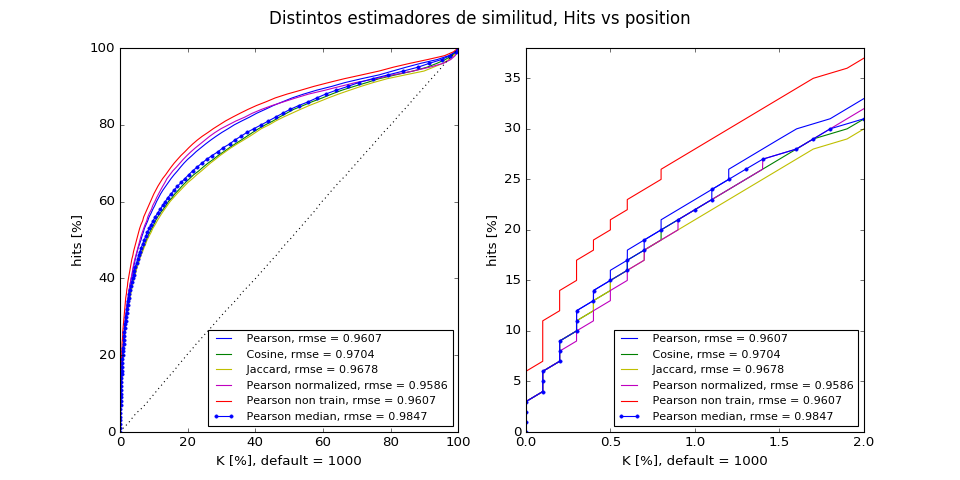

Se puede ver que para el caso de "Pearson not train", el 37% de las veces, el item relevante aparece dentro del 2% top list. Es decir, el 37% de las veces el item esta dentro de los primeros 20 items recomendados. 

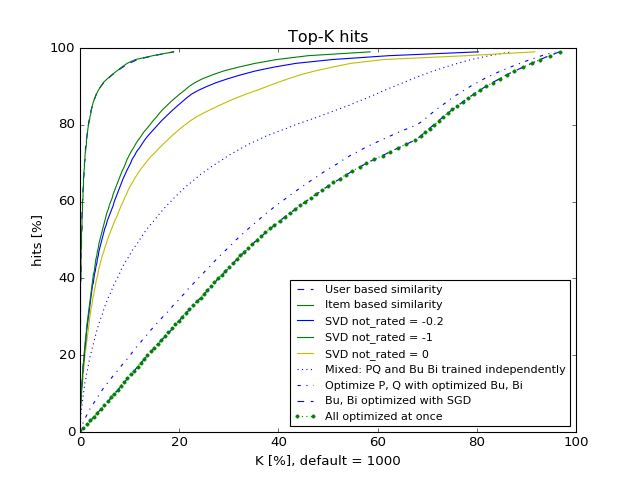

** Ejemplo movielens **

Bajar el dataset desde aca:

http://files.grouplens.org/datasets/movielens/ml-100k.zip

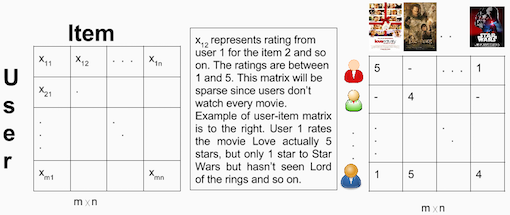

** Cargo dataset **

In [20]:
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep='\t', names=header)
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))
df[:4]

Number of users = 943 | Number of movies = 1682


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923


** Separo test de train y armo matrices**

In [21]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25)

In [22]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [23]:
print(test_data_matrix.shape)
print(train_data_matrix.shape)
train_data_matrix

(943, 1682)
(943, 1682)


array([[ 5.,  3.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### User-Item

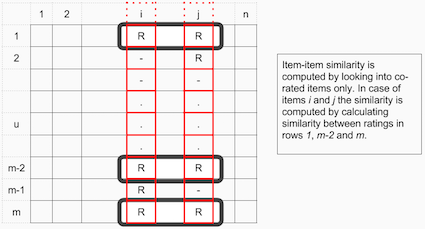

$\huge \hat{x}_{k,m} = \frac{\bar{x}_k+\sum_{u_a}sim_u(u_k,u_a)(x_{a,m}-\bar{x}_{u_a})}{\sum_{u_a}|sum_u(u_k,u_a)|}$

In [32]:
mu = train_data_matrix[train_data_matrix.nonzero()].mean()
train_data_matrix_norm = (train_data_matrix - mu)*(train_data_matrix>0)

In [34]:
user_similarity = cosine_similarity(train_data_matrix_norm)

In [35]:
np.argsort(user_similarity, axis = 1).T[::-1].T

array([[  0, 591, 456, ..., 934, 738,  37],
       [  1, 650, 309, ..., 430,  38, 865],
       [  2, 154, 577, ..., 783, 145, 687],
       ..., 
       [940, 358, 840, ..., 459, 901, 210],
       [941, 693, 232, ..., 133, 123, 842],
       [942, 193, 714, ..., 603, 504, 126]])

In [36]:
user_similarity[0,0]

1.0000000000000004

In [37]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [41]:
user_prediction = predict(train_data_matrix, user_similarity, type='user')+mu

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [43]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))

User-based CF RMSE: 1.2234044681547338
User-based CF RMSE: 1.2254764570255137


### Item-Item

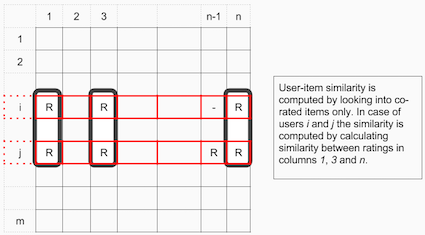

$\huge \hat{x}_{k,m} = \frac{\sum_{i_b}sim_i(i_m,i_b)x_{k,b}}{\sum_{i_b}|sum_i(i_m,i_b)|}$


## Model-Based
No tenemos features (Feature learning) tenemos que aprender tanto los  $\Theta$ como los $X$


$\huge  J = \frac{1}{2} \sum_{j=1}^{n_u} \sum_{i:r(i,j)=1} (\theta^{(j)^T}x^{(i)}-y^{(i,j)})^2 + 
\frac{\lambda}{2}\sum_{j=1}^{n_u} \sum_{k=1}^{n_f}\theta_k^{(j)^2} +
\frac{\lambda}{2}\sum_{i=1}^{n_m} \sum_{k=1}^{n_f}X_k^{(i)^2}$


$\huge J = \sum\limits_{(u,i)\in K}{(r_{ui} - \hat{r_{ui}})^2} + \lambda (||P_u||^2 + ||Q_i||^2) $  

**Algoritmos**:
- ALS (Alternated-Least-Squares)
- SGD (Stochastic Gradient Descent)
- SGD es más eficiente computacionalmente y suele tener mejor resultados salvo en casos de 'sparse data'
- http://cs229.stanford.edu/proj2014/Christopher%20Aberger,%20Recommender.pdf
- SVD (Singular Value Decomposition)

**Low Rank Matrix Factorization**:
Otra forma de pensar Model-Based CF y permite medir simitud entre peliculas o personas

# SVD

$\huge R = P_{mk}S_{kk}Q^T_{kn}$

- https://d3c33hcgiwev3.cloudfront.net/PZRCVq_6EeaoWA59UGLCkA.processed/full/540p/index.mp4?Expires=1513382400&Signature=h0kZOCNli45RxtcBxksVva5SAixX5X0GdmbPCiJMLldT6NInjrFxZoAVoF1JgXBCyMD-B0sjh-Ymo8aMTTDBftY9nWo0fN3d6KO4qdtepcmB3ocof3UQ-58pFvM4PbYLIaYXS0D~bynrjmoEMOukr8~yAc1dKDmXbmNsBrtVRUw_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A
- La matriz S es diagonal. Sus valores estan ordenados de mayor a menor. 
- Cada valor de la diagonal de S indica que tan importante es ese feature
- Puedo quedarme con los primeros y aproximar la matriz R
- Tengo que definir las peliculas no calificadas con algun valor 
- Tanto P como Q son ortogonales
- Si R es una matriz real, la decomposición existe
- Elegimos el K y nos garantiza que el la mejor aproximación de rango K (Rank K best aproximation) Trunkated SVD

# PMF (Probabilistic Matrix Factorization)
Es equivalente a Matrix Factorization desde otro punto de vista


$\huge R = P_{mk}Q^T_{kn}$

Modelo generativo

- Rij -> Distribución gaussiana con media PiQj
- Pi -> Distribución gaussian con media cero. Probabilidad de que un usuario seleccione un topico
- Qj -> Distribución gaussian con media cero. Probabilidad de que dentro de un tópico se seleccione un item (No depende del usuario)
- El producto de P y Q equivale a la probabilidad de que un usuario elija un item ya que se suma en todos los tópicos K
- Tópico = Latent Feature

# ¿Que diferencias tiene con NMF (Non-negative matrix factorization)?